In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01')

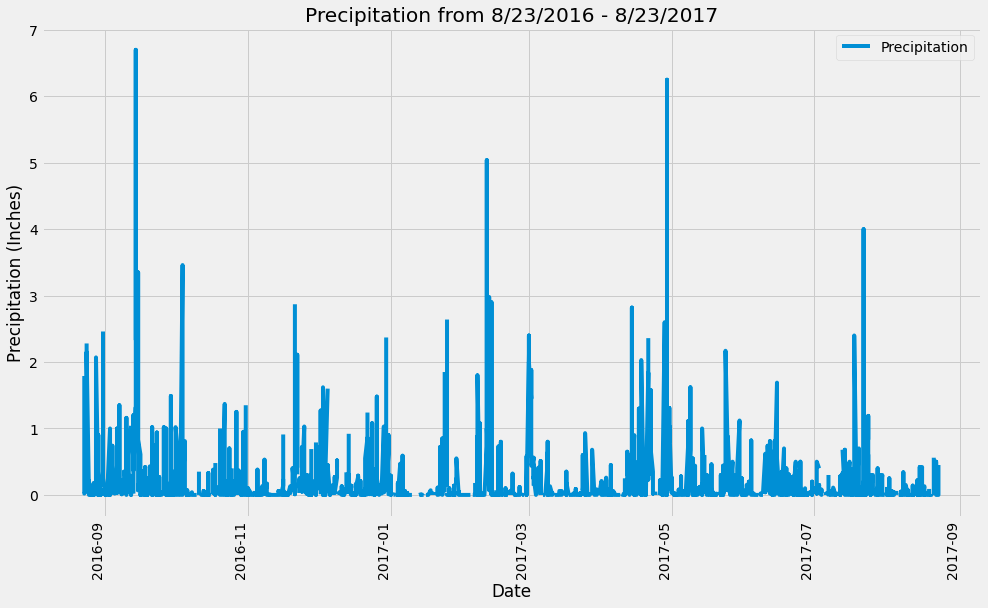

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date

# Calculate the date one year from the last date in data set.
year = dt.date(2017,8,23) - dt.timedelta(days=365)
year

# Perform a query to retrieve the data and precipitation scores
p_year = session.query(measurement.date, (measurement.prcp)).\
                filter(measurement.date >= year).all()
p_year

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(p_year, columns=['Date', 'Precipitation'])
precipitation['Date'] = pd.to_datetime(precipitation['Date'])
# precipitation= precipitation.set_index('Date')
precipitation.dtypes

# Sort the dataframe by date
precipitation_sorted = precipitation.sort_values(by=['Date'])
precipitation_sorted.dtypes

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_sorted.plot(x='Date', y='Precipitation', rot=90, figsize=(15,10))

plt.title("Precipitation from 8/23/2016 - 8/23/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = precipitation.describe()
df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
inspector = inspect(engine)
m=inspector.get_columns('measurement')
for column in m:
    print(column['name'])

id
station
date
prcp
tobs


In [16]:
# Design a query to calculate the total number stations in the dataset
count = session.query(station.id).count()
count

9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = active[0][0]

session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps= session.query(measurement.station, measurement.tobs).\
            filter(measurement.station == best_station).\
            filter(measurement.date >= year).all()
temps_df = pd.DataFrame(temps)
temps_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


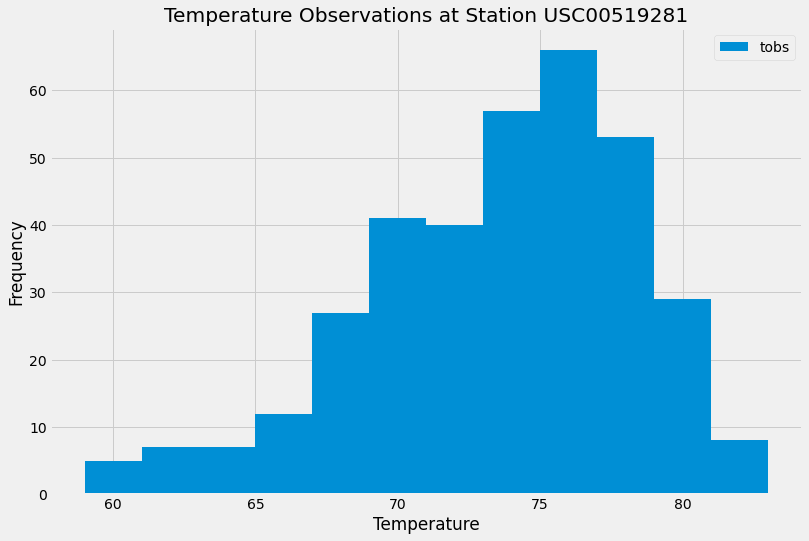

In [44]:
# Histogram plot
temps_df.plot.hist(by='station', bins=12, figsize=(12,8), grid=True)
plt.title("Temperature Observations at Station USC00519281")
plt.xlabel("Temperature")
plt.show()


# Close session

In [45]:
# Close Session
session.close()